# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [41]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [29]:
df = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [30]:
print("Shape of the dataset:", df.shape)


Shape of the dataset: (4324, 9)


In [31]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 4324
Number of columns: 9


In [32]:
print("Column names:", df.columns.tolist())


Column names: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']


In [10]:
print("Missing values per column:")
print(df_data.isna().sum())


Missing values per column:
Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


In [33]:
print("Total missing values:", df.isna().sum().sum())


Total missing values: 3360


In [34]:
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

## Descriptive Statistics

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [35]:
# Count how many times each organisation appears
launch_counts = df['Organisation'].value_counts().sort_values(ascending=False)

# Display the counts
launch_counts


,count
Organisation,
RVSN USSR,1777
Arianespace,279
General Dynamics,251
CASC,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-20-9d03e109d71e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=launch_counts.values, y=launch_counts.index, palette="viridis")


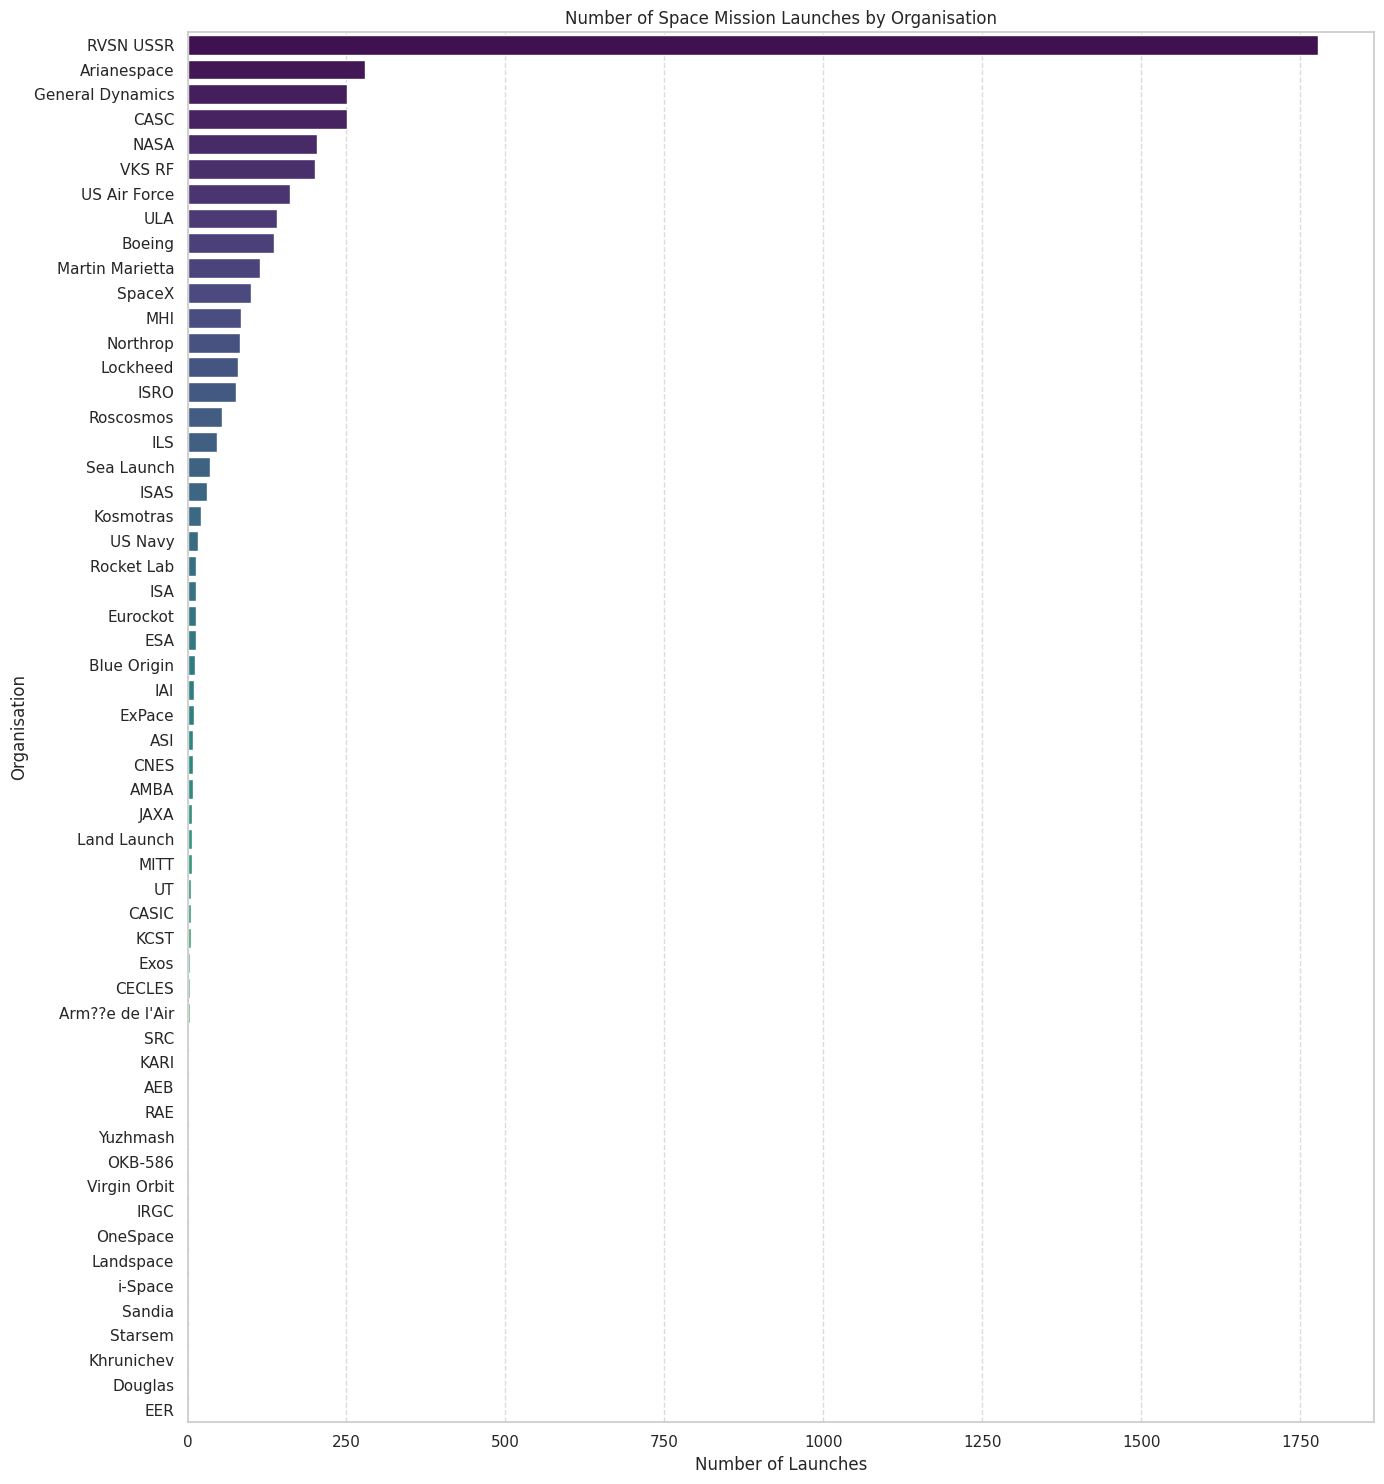

In [20]:
plt.figure(figsize=(14, 15))
sns.set(style="whitegrid")
sns.barplot(x=launch_counts.values, y=launch_counts.index, palette="viridis")
plt.xlabel('Number of Launches')
plt.ylabel('Organisation')
plt.title('Number of Space Mission Launches by Organisation')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [36]:
# Count number of rockets by status
rocket_status_counts = df['Rocket_Status'].value_counts()
print(rocket_status_counts)


Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64


<ipython-input-24-3b8f4d3a1c08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rocket_status_counts.index, y=rocket_status_counts.values, palette="coolwarm")


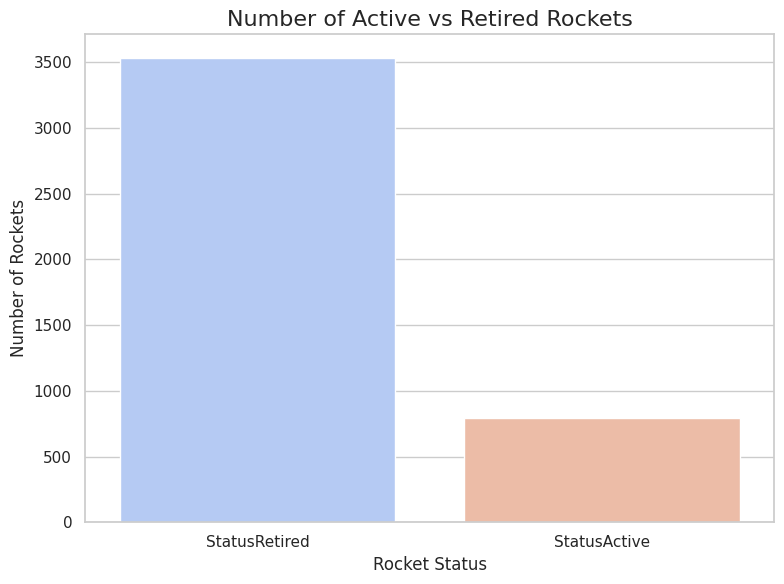

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style and size
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Bar chart
sns.barplot(x=rocket_status_counts.index, y=rocket_status_counts.values, palette="coolwarm")

# Titles and labels
plt.title("Number of Active vs Retired Rockets", fontsize=16)
plt.xlabel("Rocket Status")
plt.ylabel("Number of Rockets")

plt.tight_layout()
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [37]:
# Count how many missions fall into each status category
mission_status_counts = df['Mission_Status'].value_counts()
print(mission_status_counts)


Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


<ipython-input-26-afdec18caf3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mission_status_counts.index, y=mission_status_counts.values, palette="Set2")


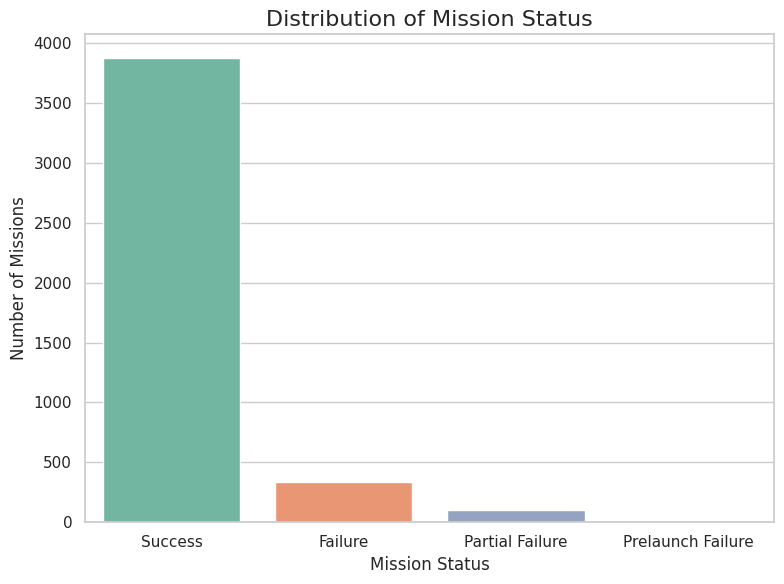

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x=mission_status_counts.index, y=mission_status_counts.values, palette="Set2")

plt.title("Distribution of Mission Status", fontsize=16)
plt.xlabel("Mission Status")
plt.ylabel("Number of Missions")

plt.tight_layout()
plt.show()


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [38]:
df['Price'].head()

# Convert 'Price' to numeric (handle missing or invalid entries)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows where price is missing
price_data = df['Price'].dropna()

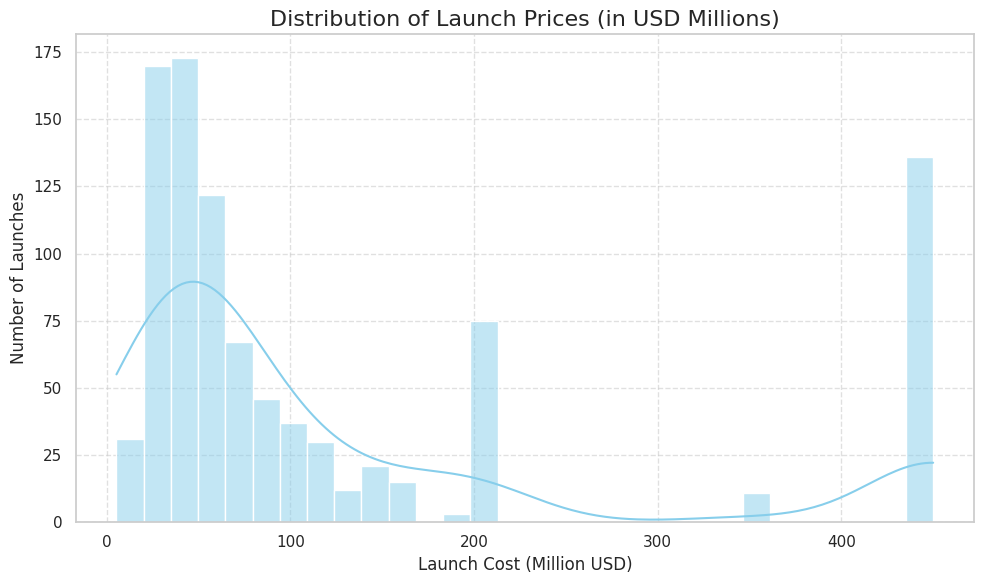

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(price_data, bins=30, kde=True, color='skyblue')

plt.title("Distribution of Launch Prices (in USD Millions)", fontsize=16)
plt.xlabel("Launch Cost (Million USD)")
plt.ylabel("Number of Launches")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [39]:
# Assume the location column is named 'Location'
# This code extracts the country name (last part of the string)

df['Country'] = df['Location'].apply(lambda x: str(x).split(',')[-1].strip())

# Show the first few extracted countries
df[['Location', 'Country']].head()


,Location,Country
0,"LC-39A, Kennedy Space Center, Florida, USA",USA
1,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",China
2,"Pad A, Boca Chica, Texas, USA",USA
3,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Kazakhstan
4,"SLC-41, Cape Canaveral AFS, Florida, USA",USA


In [40]:
df['Country'] = df['Country'].replace({
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    'Russia': 'Russian Federation'
})


In [42]:
from iso3166 import countries

# Function to safely get the ISO Alpha-3 code
def get_alpha3(country_name):
    try:
        return countries.get(country_name).alpha3
    except:
        return None  # Return None if country is not found

# Apply the function to create a new column
df['Country Code'] = df['Country'].apply(get_alpha3)

# Check the result
df[['Country', 'Country Code']].drop_duplicates().head(10)


,Country,Country Code
0,USA,USA
1,China,CHN
3,Kazakhstan,KAZ
9,Japan,JPN
13,Israel,ISR
15,New Zealand,NZL
28,Russian Federation,RUS
35,Iran,None
48,France,FRA
72,India,IND


# Use a Choropleth Map to Show the Number of Failures by Country


In [44]:
# Filter only failed missions (case-insensitive match)
failed_df = df[df['Mission_Status'].str.lower() == 'failure']


In [45]:
# Count the number of failures per country
failures_by_country = failed_df['Country Code'].value_counts().reset_index()
failures_by_country.columns = ['Country Code', 'Failures']


In [46]:
import plotly.express as px

# Create choropleth map
fig = px.choropleth(failures_by_country,
                    locations='Country Code',
                    color='Failures',
                    color_continuous_scale='Reds',
                    title='Number of Failed Space Missions by Country',
                    projection='natural earth')

fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [47]:
# Group data by Country, Organisation, and Mission Status
sunburst_data = df.groupby(['Country', 'Organisation', 'Mission_Status']).size().reset_index(name='Count')


In [50]:
import plotly.express as px

fig = px.sunburst(
    sunburst_data,
    path=['Country', 'Organisation', 'Mission_Status'],  # hierarchy
    values='Count',
    color='Mission_Status',
    color_discrete_map={
        'Success': 'green',
        'Failure': 'red',
        'Partial Failure': 'orange',
        'Prelaunch Failure': 'gray'
    },
    title='Sunburst of Country → Organisation → Mission Status'
)

fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [51]:
# Convert Price to numeric and remove missing entries
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
clean_df = df.dropna(subset=['Price'])  # remove rows with missing prices


In [52]:
money_spent = clean_df.groupby('Organisation')['Price'].sum().sort_values(ascending=False).reset_index()
money_spent.columns = ['Organisation', 'Total Spent (Million USD)']

In [53]:
import plotly.express as px

fig = px.bar(
    money_spent.head(15),  # top 15 spenders
    x='Organisation',
    y='Total Spent (Million USD)',
    title='Total Money Spent by Organisation on Space Missions',
    text='Total Spent (Million USD)',
    labels={'Total Spent (Million USD)': 'Total Spent (Million USD)'},
    color='Total Spent (Million USD)',
    color_continuous_scale='Blues'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Analyse the Amount of Money Spent by Organisation per Launch

In [54]:

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
clean_df = df.dropna(subset=['Price'])


In [56]:
# Group by organisation and calculate average price
avg_cost_per_launch = clean_df.groupby('Organisation')['Price'].mean().sort_values(ascending=False).reset_index()
avg_cost_per_launch.columns = ['Organisation', 'Average Cost per Launch (Million USD)']


In [57]:
import plotly.express as px

fig = px.bar(
    avg_cost_per_launch.head(15),  # Top 15 by average cost
    x='Organisation',
    y='Average Cost per Launch (Million USD)',
    title='Average Launch Cost by Organisation',
    text='Average Cost per Launch (Million USD)',
    color='Average Cost per Launch (Million USD)',
    color_continuous_scale='Purples'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Chart the Number of Launches per Year

In [58]:
# Convert to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract the year from the date
df['Year'] = df['Date'].dt.year


In [59]:
# Count number of launches per year
launches_per_year = df['Year'].value_counts().sort_index().reset_index()
launches_per_year.columns = ['Year', 'Launches']


In [60]:
import plotly.express as px

fig = px.line(
    launches_per_year,
    x='Year',
    y='Launches',
    title='Number of Space Launches per Year',
    markers=True
)

fig.update_traces(line_color='blue')
fig.update_layout(xaxis=dict(dtick=2))  # show every 2nd year for clarity
fig.show()


In [61]:
fig = px.bar(
    launches_per_year,
    x='Year',
    y='Launches',
    title='Number of Space Launches per Year (Bar Chart)',
    color='Launches',
    color_continuous_scale='Blues'
)
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [62]:
# Ensure the date is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create a 'YearMonth' column for grouping (e.g. 2020-01, 2020-02, ...)
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str)


<ipython-input-62-c0ced9146942>:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [63]:
# Count number of launches per YearMonth
monthly_launches = df['YearMonth'].value_counts().sort_index().reset_index()
monthly_launches.columns = ['YearMonth', 'Launches']


In [64]:
import plotly.express as px

fig = px.line(
    monthly_launches,
    x='YearMonth',
    y='Launches',
    title='Month-on-Month Space Launches Since 1957',
    markers=True
)

fig.update_layout(
    xaxis_title='Year-Month',
    yaxis_title='Number of Launches',
    xaxis_tickangle=45,
    xaxis=dict(tickmode='array', tickvals=monthly_launches['YearMonth'][::24]),  # show every 2 years
    height=500
)

fig.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

<ipython-input-83-bc585740d6dc>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




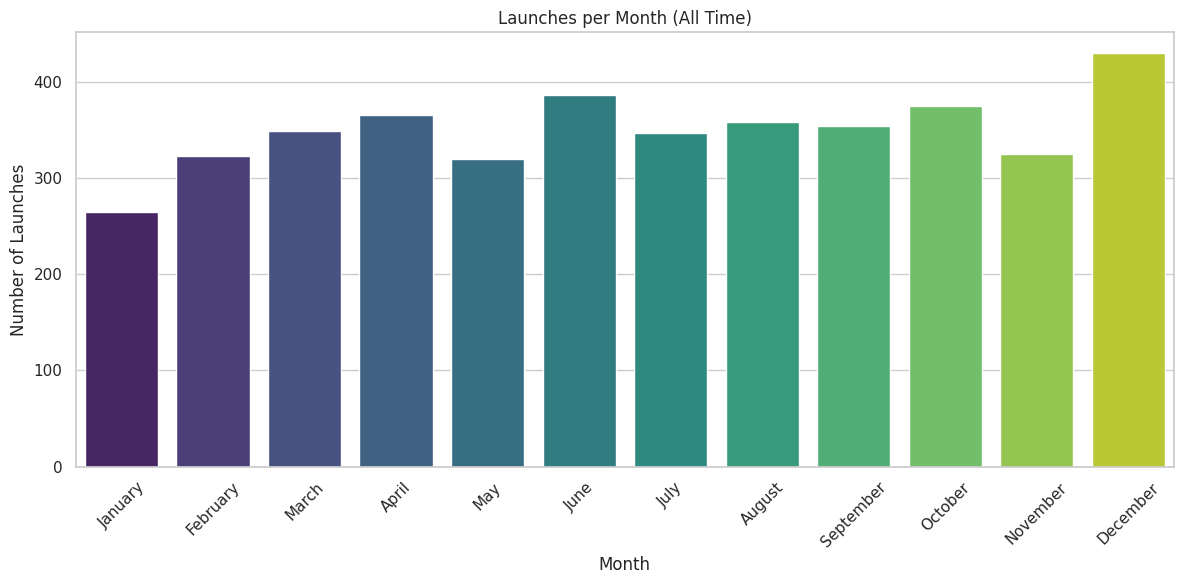

In [83]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month names
df['Month'] = df['Date'].dt.month_name()

# Count launches per month
month_counts = df['Month'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Launches per Month (All Time)')
plt.ylabel('Number of Launches')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

<ipython-input-85-4c5ea3dec409>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




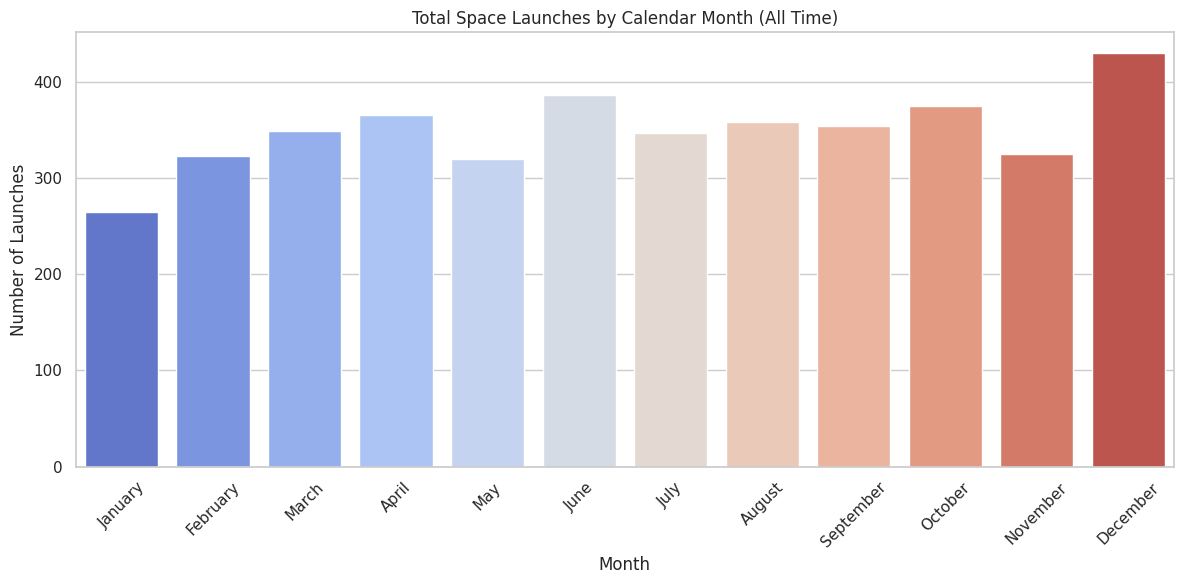

In [85]:
df['Month'] = df['Date'].dt.month
df['MonthName'] = df['Date'].dt.month_name()
monthly_avg = df.groupby(['Month', 'MonthName']).size().reset_index(name='Launches')

# Sort by month number
monthly_avg = monthly_avg.sort_values('Month')

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='MonthName', y='Launches', data=monthly_avg, palette='coolwarm')

plt.title('Total Space Launches by Calendar Month (All Time)')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

<ipython-input-86-5700debda5d7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



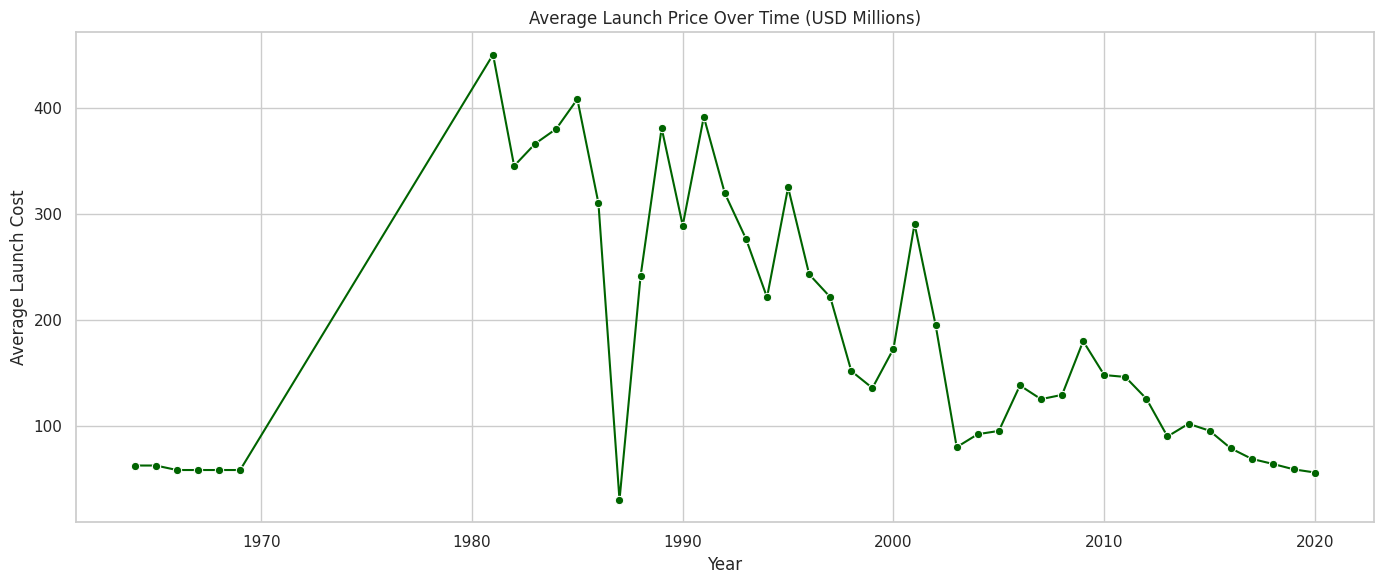

In [86]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to float (in millions USD)

# Step 2: Drop rows with missing prices or dates
df_price = df.dropna(subset=['Date', 'Price'])

# Step 3: Extract year
df_price['Year'] = df_price['Date'].dt.year

# Step 4: Group by year and calculate average price
yearly_price = df_price.groupby('Year')['Price'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_price, x='Year', y='Price', marker='o', color='darkgreen')
plt.title('Average Launch Price Over Time (USD Millions)')
plt.xlabel('Year')
plt.ylabel('Average Launch Cost')
plt.grid(True)
plt.tight_layout()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

<ipython-input-88-a093291b2716>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



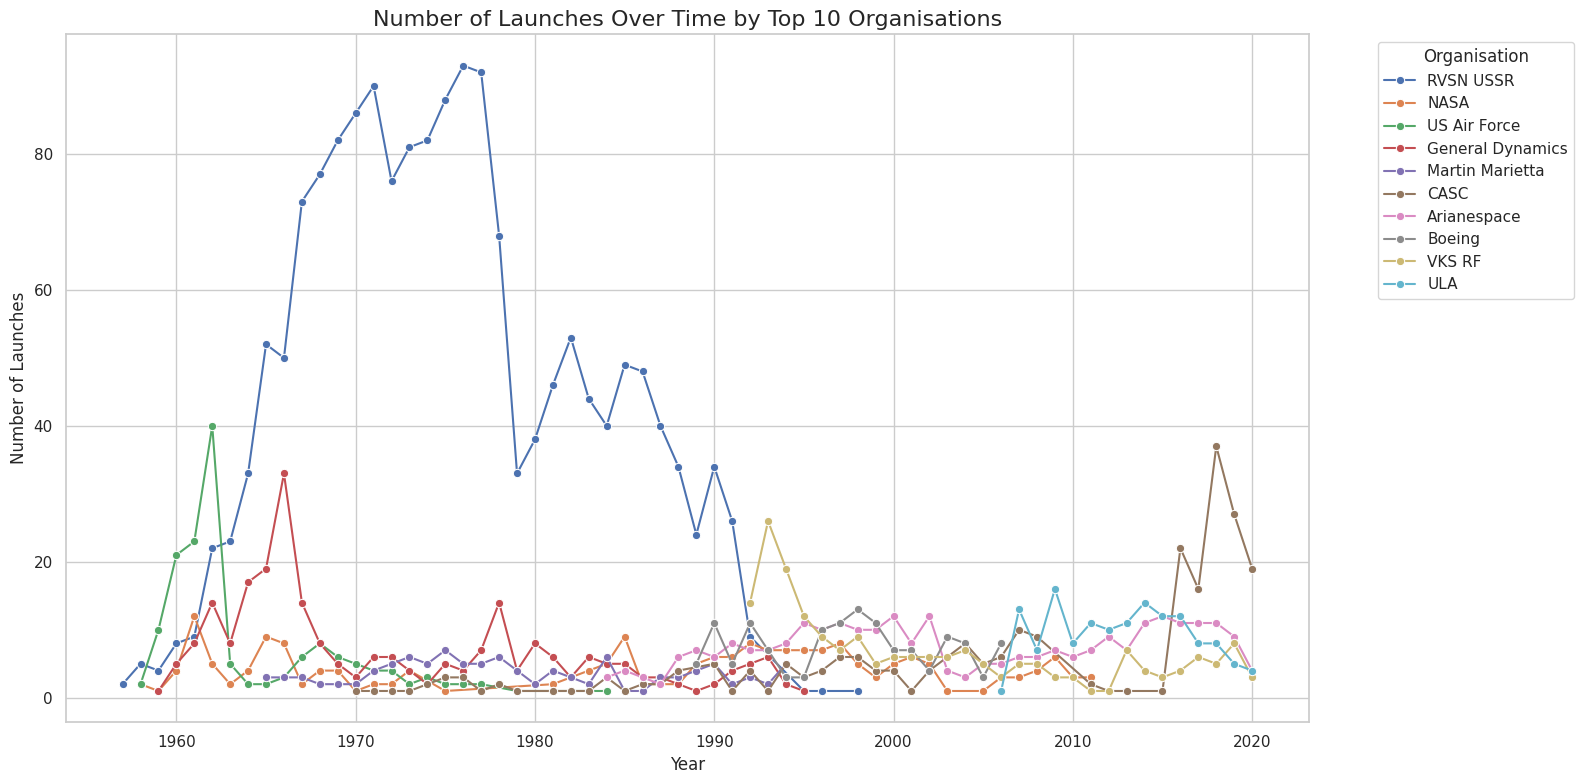

In [88]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows without Organisation or Date
df_org = df.dropna(subset=['Organisation', 'Date'])

# Extract Year
df_org['Year'] = df_org['Date'].dt.year

# Count launches by Organisation
top_orgs = df_org['Organisation'].value_counts().nlargest(10).index

# Filter to only top 10 organisations
df_top_orgs = df_org[df_org['Organisation'].isin(top_orgs)]

# Group by Year and Organisation to count launches
launches_by_org_year = df_top_orgs.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

# Plot
plt.figure(figsize=(16,8))
sns.lineplot(data=launches_by_org_year, x='Year', y='Launches', hue='Organisation', marker='o')
plt.title('Number of Launches Over Time by Top 10 Organisations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Organisation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-89-150c796bfb44>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1600x800 with 0 Axes>

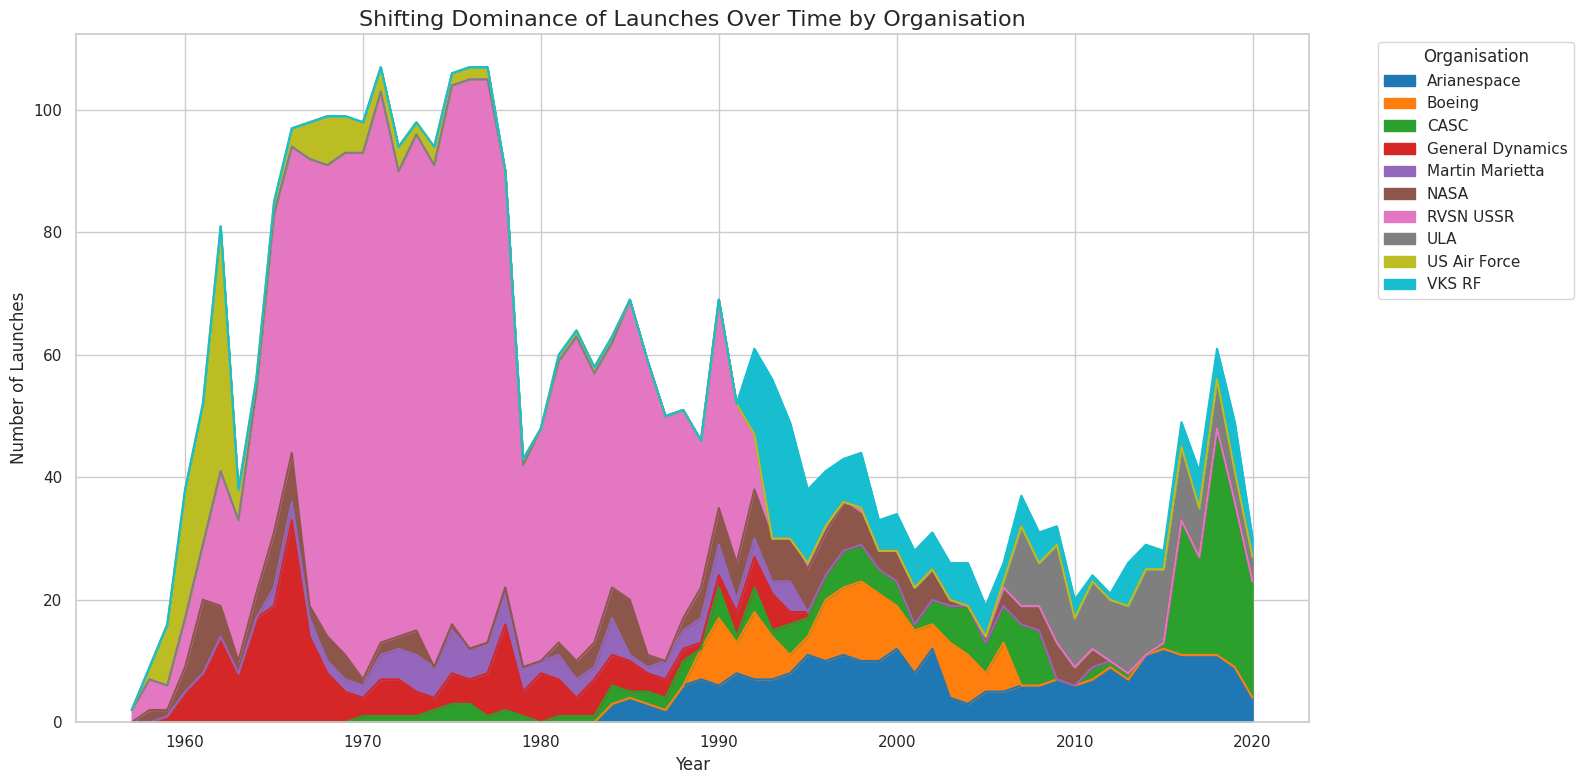

In [89]:
# Ensure Date column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Organisation'])

# Extract Year
df['Year'] = df['Date'].dt.year

# Filter to top 10 organisations by total number of launches
top_10_orgs = df['Organisation'].value_counts().nlargest(10).index
df_top = df[df['Organisation'].isin(top_10_orgs)]

# Group by Year and Organisation
launch_counts = df_top.groupby(['Year', 'Organisation']).size().unstack(fill_value=0)

# Sort years
launch_counts = launch_counts.sort_index()

# Plot: Stacked Area Chart
plt.figure(figsize=(16, 8))
launch_counts.plot.area(stacked=True, figsize=(16, 8), cmap='tab10')
plt.title("Shifting Dominance of Launches Over Time by Organisation", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

<ipython-input-90-c72ef7cd0bec>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-c72ef7cd0bec>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-c72ef7cd0bec>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-c72ef7

<Figure size 1400x700 with 0 Axes>

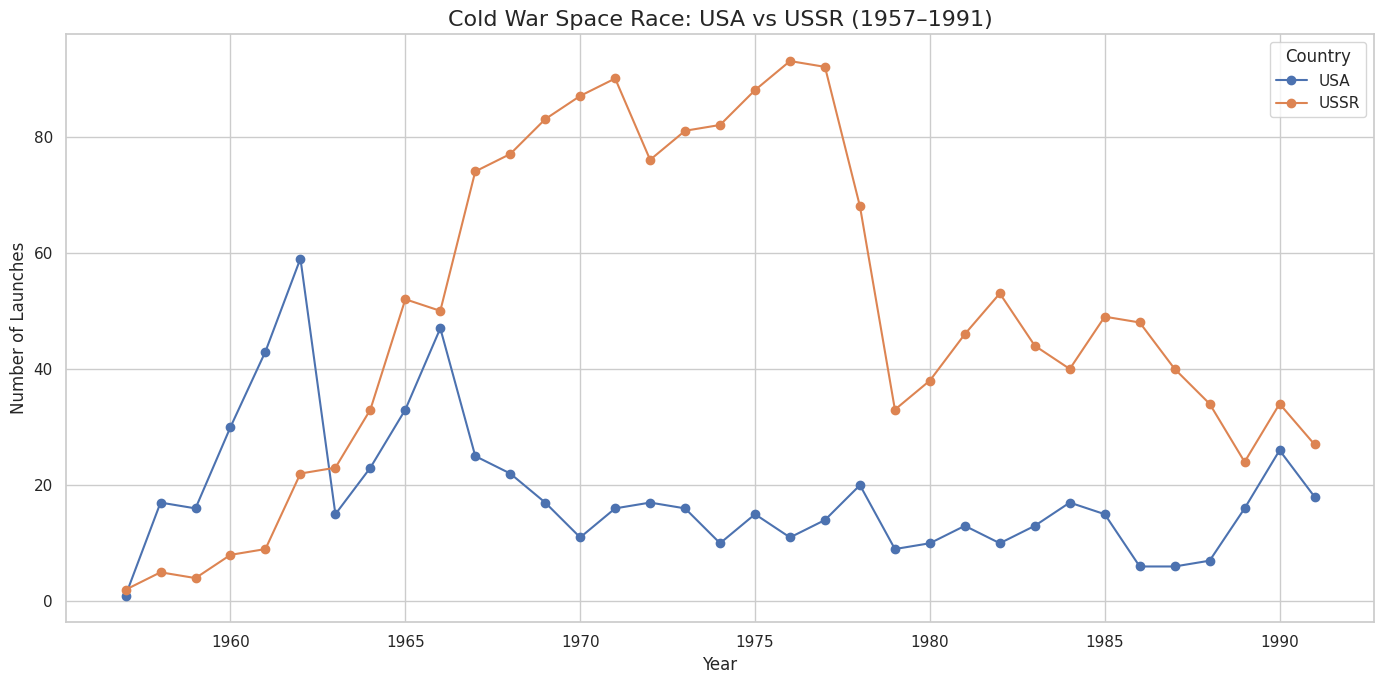

In [90]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Location'])

# Filter for Cold War years
df_cold_war = df[(df['Date'].dt.year >= 1957) & (df['Date'].dt.year <= 1991)]

# Extract year
df_cold_war['Year'] = df_cold_war['Date'].dt.year

# Extract country from Location column (last part after comma)
df_cold_war['Country'] = df_cold_war['Location'].str.split(',').str[-1].str.strip()

# Normalize USSR name
df_cold_war['Country'] = df_cold_war['Country'].replace({
    'Russia': 'USSR',
    'Kazakhstan': 'USSR',
    'Russian Federation': 'USSR',
    'Baikonur Cosmodrome': 'USSR',
    'USA': 'USA'
})

# Filter only USA and USSR
df_usa_ussr = df_cold_war[df_cold_war['Country'].isin(['USA', 'USSR'])]

# Group by Year and Country
launches_cold_war = df_usa_ussr.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(14, 7))
launches_cold_war.plot(kind='line', marker='o', figsize=(14,7))
plt.title('Cold War Space Race: USA vs USSR (1957–1991)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [91]:
df['Country_Group'] = df['Country'].replace({
    'Russia': 'USSR',
    'Kazakhstan': 'USSR',
    'Russian Federation': 'USSR',
    'USA': 'USA'
})

# Filter only Cold War period (1957–1991)
cold_war_df = df[(df['Date'].dt.year >= 1957) & (df['Date'].dt.year <= 1991)]

# Filter only USSR and USA
df_filtered = cold_war_df[cold_war_df['Country_Group'].isin(['USA', 'USSR'])]

# Count total launches
launch_counts = df_filtered['Country_Group'].value_counts().reset_index()
launch_counts.columns = ['Country', 'Launches']

# Plotly Pie Chart
fig = px.pie(
    launch_counts,
    names='Country',
    values='Launches',
    title='Total Space Launches by USA vs USSR (1957–1991)',
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Figure size 1400x700 with 0 Axes>

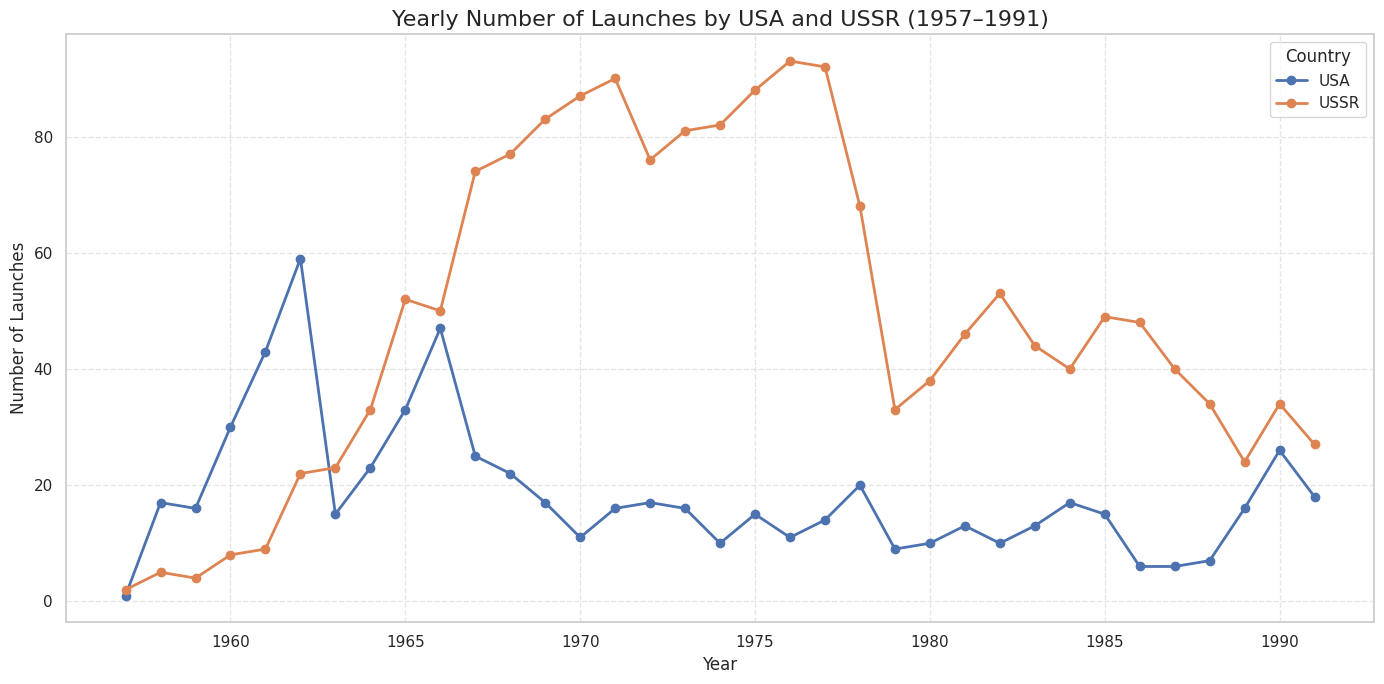

In [92]:
cold_war_df = df[(df['Year'] >= 1957) & (df['Year'] <= 1991)]
cold_war_df = cold_war_df[cold_war_df['Country_Group'].isin(['USA', 'USSR'])]

# Group by year and country group
launches_per_year = cold_war_df.groupby(['Year', 'Country_Group']).size().unstack(fill_value=0)

# Plot the line chart
plt.figure(figsize=(14, 7))
launches_per_year.plot(marker='o', figsize=(14, 7), linewidth=2)
plt.title('Yearly Number of Launches by USA and USSR (1957–1991)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


## Chart the Total Number of Mission Failures Year on Year.

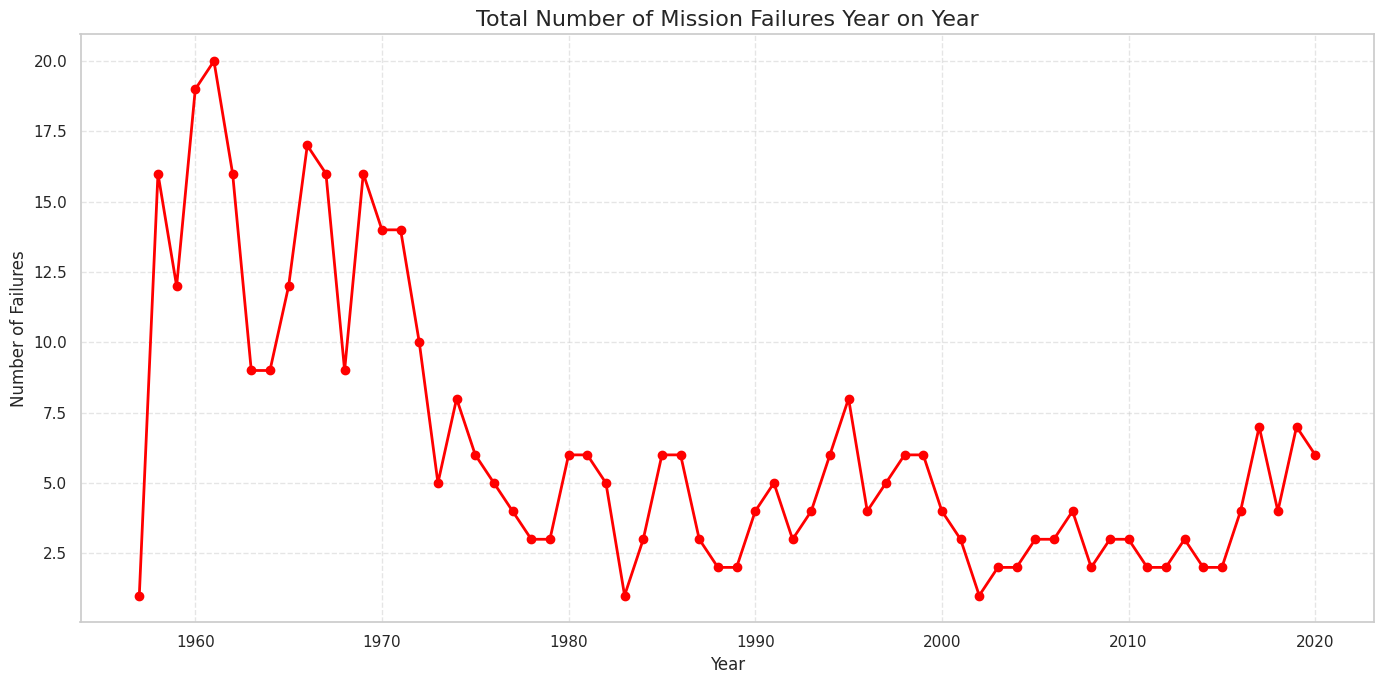

In [95]:
df['Mission_Status'] = df['Mission_Status'].str.strip().str.lower()

# Filter for failed missions
failure_df = df[df['Mission_Status'].str.contains('failure')]

# Group by year and count failures
failures_per_year = failure_df.groupby('Year').size().reset_index(name='Failures')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(failures_per_year['Year'], failures_per_year['Failures'], marker='o', color='red', linewidth=2)
plt.title('Total Number of Mission Failures Year on Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Failures')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

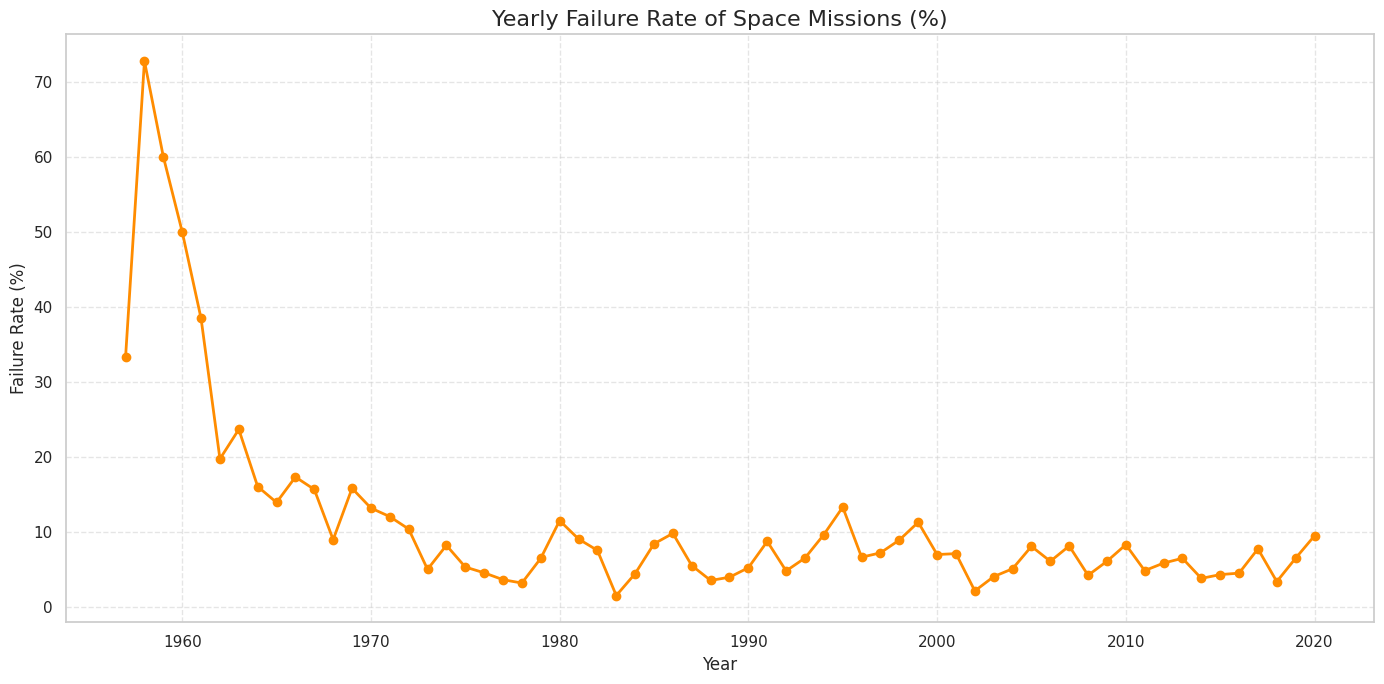

In [96]:
total_per_year = df.groupby('Year').size()

# Count failures per year
failures_per_year = df[df['Mission_Status'].str.contains('failure')].groupby('Year').size()

# Combine into one DataFrame
failure_rate = pd.DataFrame({
    'Total_Launches': total_per_year,
    'Failures': failures_per_year
}).fillna(0)

# Calculate failure rate percentage
failure_rate['Failure_Rate (%)'] = (failure_rate['Failures'] / failure_rate['Total_Launches']) * 100

# Plot
plt.figure(figsize=(14, 7))
plt.plot(failure_rate.index, failure_rate['Failure_Rate (%)'], marker='o', color='darkorange', linewidth=2)
plt.title('Yearly Failure Rate of Space Missions (%)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Failure Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [98]:
df = df[df['Year'] <= 2020]  # Include only up to 2020

# Extract country from location (assumes country is last part after comma)
df['Country'] = df['Location'].apply(lambda x: x.strip().split(',')[-1].strip())

# =====================
# Total launches per country per year
# =====================
total_launches = df.groupby(['Year', 'Country']).size().reset_index(name='Total_Launches')

# Find leading country each year (total)
leaders_total = total_launches.loc[total_launches.groupby('Year')['Total_Launches'].idxmax()]
leaders_total = leaders_total.reset_index(drop=True)

# =====================
# Successful launches per country per year
# =====================
df['Mission_Status'] = df['Mission_Status'].str.lower().str.strip()
success_df = df[df['Mission_Status'].str.contains('success')]

success_launches = success_df.groupby(['Year', 'Country']).size().reset_index(name='Successful_Launches')
leaders_success = success_launches.loc[success_launches.groupby('Year')['Successful_Launches'].idxmax()]
leaders_success = leaders_success.reset_index(drop=True)

# =====================
# Merge both results for comparison
# =====================
comparison = pd.merge(
    leaders_total[['Year', 'Country', 'Total_Launches']],
    leaders_success[['Year', 'Country', 'Successful_Launches']],
    on='Year',
    suffixes=('_Total', '_Successful')
)

# Show first few rows
print(comparison.head(10))


   Year Country_Total  Total_Launches Country_Successful  Successful_Launches
0  1957    Kazakhstan               2         Kazakhstan                    2
1  1958           USA              17                USA                    5
2  1959           USA              16                USA                    6
3  1960           USA              30                USA                   16
4  1961           USA              43                USA                   27
5  1962           USA              59                USA                   50
6  1963    Kazakhstan              16                USA                   13
7  1964    Kazakhstan              26         Kazakhstan                   21
8  1965    Kazakhstan              43         Kazakhstan                   40
9  1966           USA              47                USA                   40


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

🔹 Dominant Organisation in 1970s:
    Year Organisation  Launches
13  1970    RVSN USSR        86
14  1971    RVSN USSR        90
15  1972    RVSN USSR        76
16  1973    RVSN USSR        81
17  1974    RVSN USSR        82
18  1975    RVSN USSR        88
19  1976    RVSN USSR        93
20  1977    RVSN USSR        92
21  1978    RVSN USSR        68
22  1979    RVSN USSR        33

🔹 Dominant Organisation in 1980s:
    Year Organisation  Launches
23  1980    RVSN USSR        38
24  1981    RVSN USSR        46
25  1982    RVSN USSR        53
26  1983    RVSN USSR        44
27  1984    RVSN USSR        40
28  1985    RVSN USSR        49
29  1986    RVSN USSR        48
30  1987    RVSN USSR        40
31  1988    RVSN USSR        34
32  1989    RVSN USSR        24

🔹 Dominant Organisation in 2018-2020:
    Year Organisation  Launches
61  2018         CASC        37
62  2019         CASC        27
63  2020         CASC        19


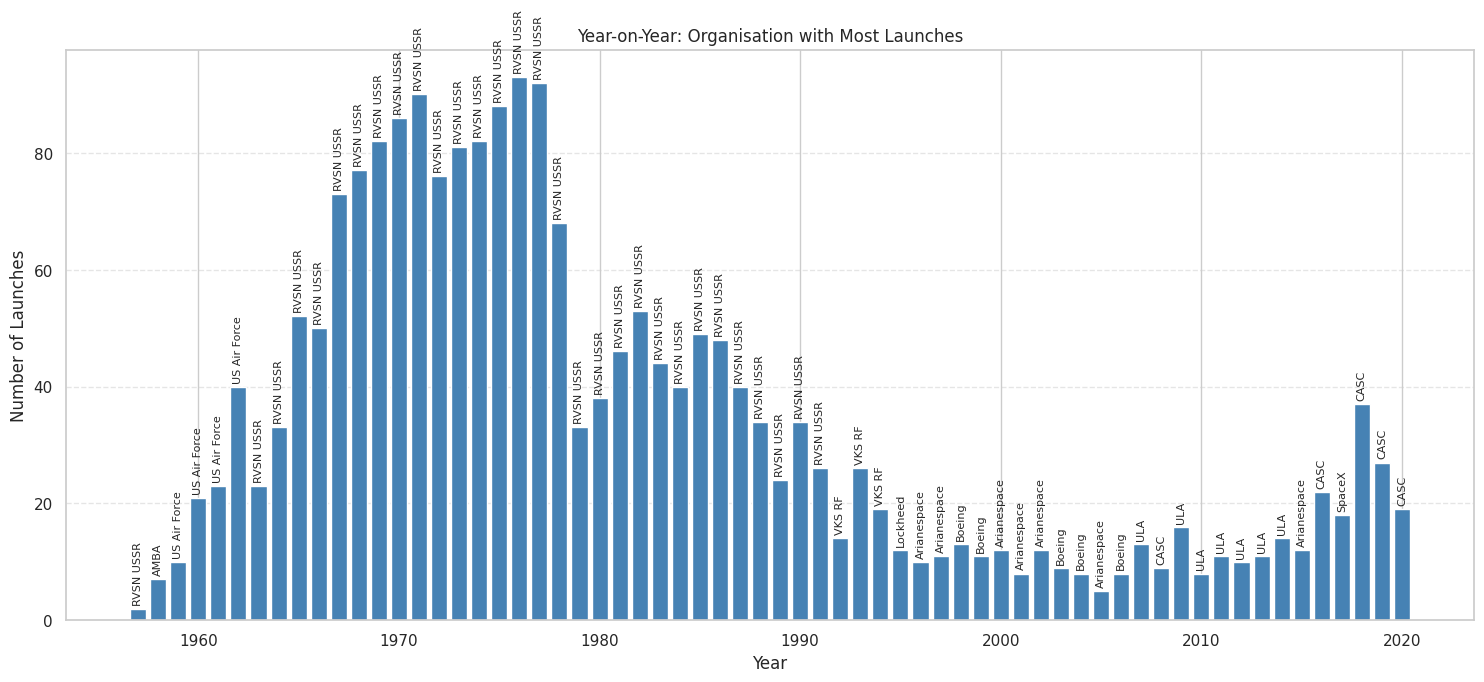

In [99]:
launches_per_org = df.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

# Find the organisation with max launches for each year
top_orgs_per_year = launches_per_org.loc[launches_per_org.groupby('Year')['Launches'].idxmax()]
top_orgs_per_year = top_orgs_per_year.reset_index(drop=True)

# Display dominance for specific years
print("🔹 Dominant Organisation in 1970s:")
print(top_orgs_per_year[top_orgs_per_year['Year'].between(1970, 1979)])

print("\n🔹 Dominant Organisation in 1980s:")
print(top_orgs_per_year[top_orgs_per_year['Year'].between(1980, 1989)])

print("\n🔹 Dominant Organisation in 2018-2020:")
print(top_orgs_per_year[top_orgs_per_year['Year'].between(2018, 2020)])

# Plot the top organisation per year
plt.figure(figsize=(15, 7))
plt.bar(top_orgs_per_year['Year'], top_orgs_per_year['Launches'], color='steelblue')
for i, org in enumerate(top_orgs_per_year['Organisation']):
    plt.text(top_orgs_per_year['Year'].iloc[i], top_orgs_per_year['Launches'].iloc[i] + 1, org, rotation=90, ha='center', fontsize=8)
plt.title('Year-on-Year: Organisation with Most Launches')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()